## LIMPIEZA

In [35]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [36]:
with open("../data/raw_data/tickets_classification_eng.json", "r") as file:  
    data = json.load(file)
 
df = pd.json_normalize(data)
df.head(5)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


### 1. Selección de Columnas:

In [37]:
df = df[["_source.complaint_what_happened", "_source.product", "_source.sub_product"]]

### 2. Renombrar Columnas:

In [38]:
df = df.rename({"_source.complaint_what_happened": "complaint_what_happened", "_source.product" : "category", "_source.sub_product": "sub_product"}, 
               axis =1)

### 3. Creación de Nueva Columna

In [39]:
df["ticket_classification"] = df["category"] + "+" + df["sub_product"]


### 4. Eliminar Columnas Redundantes

In [40]:
df  = df.drop(columns=["category", "sub_product"], axis=1)

### 5. Limpieza de Datos en Columnas Específicas

In [41]:
df["complaint_what_happened"] = df["complaint_what_happened"].replace("",pd.NA)

### 6. Eliminación de Filas con Datos Faltantes

In [42]:
df.isnull().sum()

complaint_what_happened    57241
ticket_classification      10571
dtype: int64

In [43]:
df = df.dropna()

In [44]:
df.isnull().sum()

complaint_what_happened    0
ticket_classification      0
dtype: int64

### 7. Reiniciar Índice:

In [45]:
df

,complaint_what_happened,ticket_classification
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account
...,...,...
78301,My husband passed away. Chase bank put check o...,Checking or savings account+Checking account
78303,After being a Chase Card customer for well ove...,Credit card or prepaid card+General-purpose cr...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card+General-purpose cr...
78310,I am not familiar with XXXX pay and did not un...,Checking or savings account+Checking account


In [46]:
df = df.reindex()
df.head(5)

,complaint_what_happened,ticket_classification
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account


Limpieza de las 'X' y de '//'

In [47]:
df["complaint_what_happened"] = df["complaint_what_happened"].replace(r"X", "", regex=True)

In [48]:
df

,complaint_what_happened,ticket_classification
1,Good morning my name is and I appreciate it ...,Debt collection+Credit card debt
2,I upgraded my card in //2018 and was told by...,Credit card or prepaid card+General-purpose cr...
10,"Chase Card was reported on //2019. However, fr...","Credit reporting, credit repair services, or o..."
11,"On //2018, while trying to book a ticket, ...","Credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account
...,...,...
78301,My husband passed away. Chase bank put check o...,Checking or savings account+Checking account
78303,After being a Chase Card customer for well ove...,Credit card or prepaid card+General-purpose cr...
78309,"On Wednesday, // I called Chas, my Visa Cred...",Credit card or prepaid card+General-purpose cr...
78310,I am not familiar with pay and did not unders...,Checking or savings account+Checking account


In [49]:
df["complaint_what_happened"] = df["complaint_what_happened"].replace(r"//", "", regex=True)

In [50]:
df

,complaint_what_happened,ticket_classification
1,Good morning my name is and I appreciate it ...,Debt collection+Credit card debt
2,I upgraded my card in 2018 and was told by t...,Credit card or prepaid card+General-purpose cr...
10,"Chase Card was reported on 2019. However, frau...","Credit reporting, credit repair services, or o..."
11,"On 2018, while trying to book a ticket, I ...","Credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account
...,...,...
78301,My husband passed away. Chase bank put check o...,Checking or savings account+Checking account
78303,After being a Chase Card customer for well ove...,Credit card or prepaid card+General-purpose cr...
78309,"On Wednesday, I called Chas, my Visa Credit...",Credit card or prepaid card+General-purpose cr...
78310,I am not familiar with pay and did not unders...,Checking or savings account+Checking account


## EDA

Tenemos 78 categorías

In [51]:
len(df.ticket_classification.unique())

78

Nos quedamos con las categorías que tenían 200 o más registros

In [52]:
valueCounts = df.ticket_classification.value_counts()
df = df[df["ticket_classification"].isin(valueCounts[valueCounts>=200].index)]

Nos quedamos con 15 de las 78 categorías

In [53]:
len(df.ticket_classification.unique())

15

Ahora haré un análisis exploratorio de las variables

In [54]:
df.describe()

,complaint_what_happened,ticket_classification
count,16527,16527
unique,16391,15
top,Chase has violated 15 USC 1692 by continuing c...,Credit card or prepaid card+General-purpose cr...
freq,11,4918


Distribución de categorías

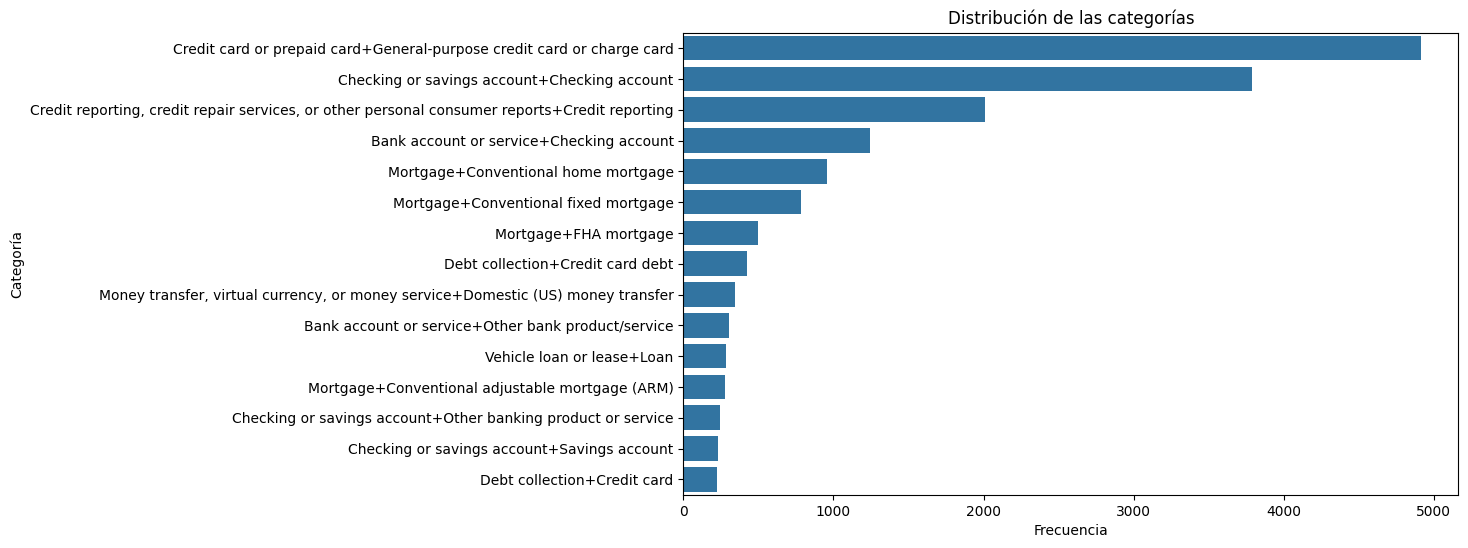

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['ticket_classification'], order=df['ticket_classification'].value_counts().index)
plt.title("Distribución de las categorías")
plt.xlabel("Frecuencia")
plt.ylabel("Categoría")
plt.show()

Nube de palabras

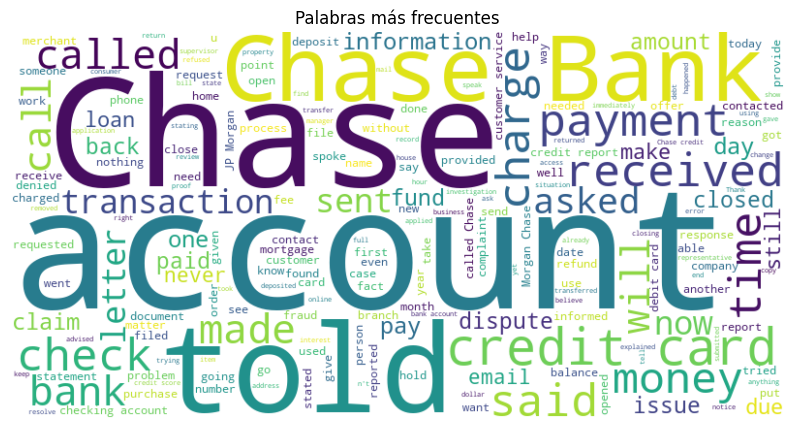

In [56]:
all_text = " ".join(df['complaint_what_happened'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palabras más frecuentes")
plt.show()

El boxplot muestra cómo varía la cantidad de palabras en los textos según la categoría de queja (ticket_classification)

/var/folders/f4/8xjydz814d5b98hfbbm_l9800000gn/T/ipykernel_3315/3300059469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['complaint_what_happened'].astype(str).apply(lambda x: len(x.split()))
/var/folders/f4/8xjydz814d5b98hfbbm_l9800000gn/T/ipykernel_3315/3300059469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ticket_classification', y='word_count', data=df, palette="Set3")


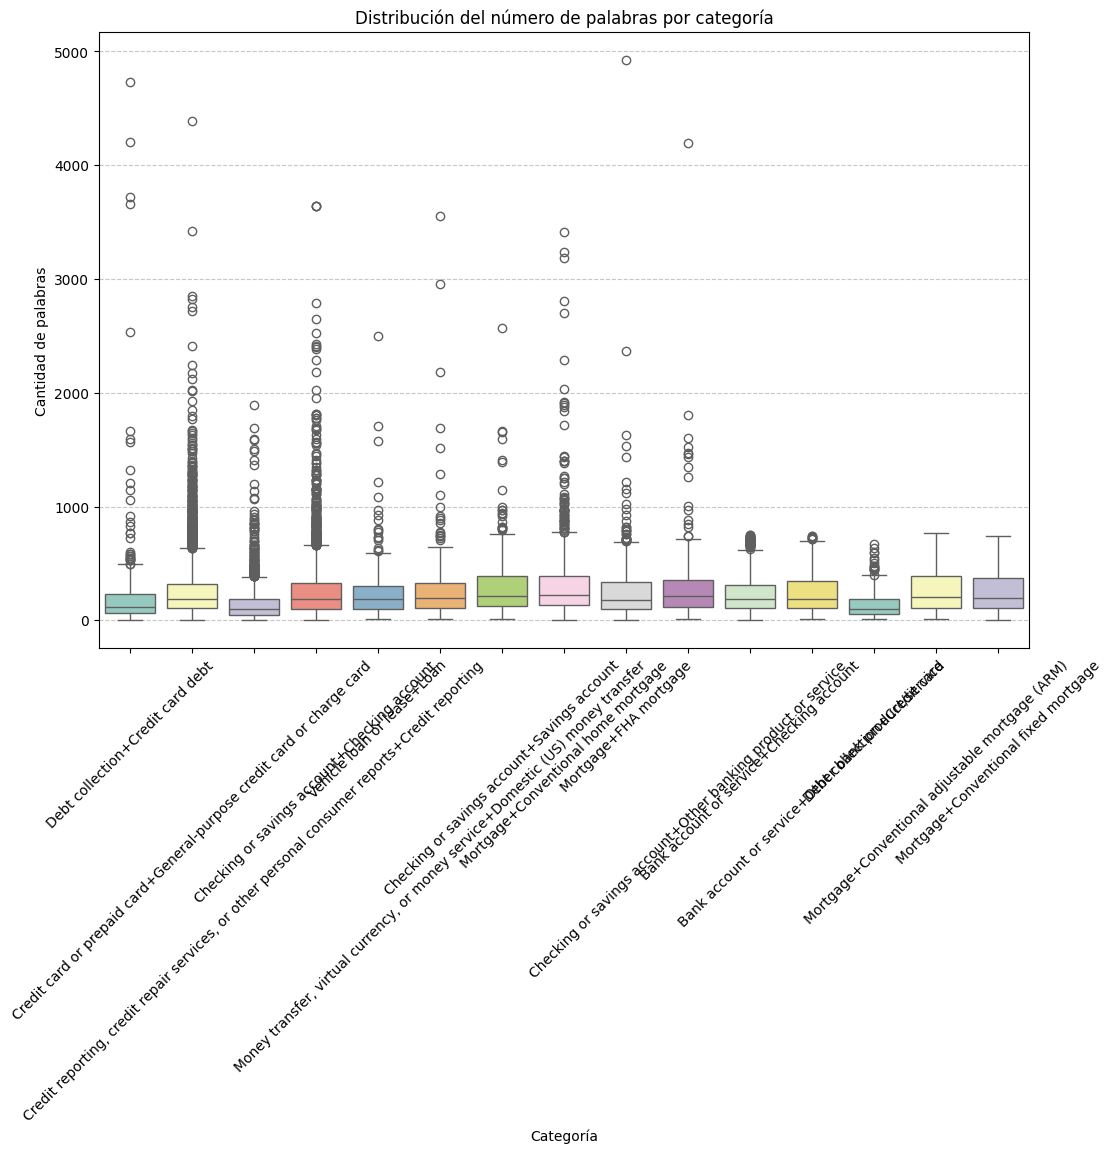

In [57]:
df['word_count'] = df['complaint_what_happened'].astype(str).apply(lambda x: len(x.split()))

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='ticket_classification', y='word_count', data=df, palette="Set3")
plt.title("Distribución del número de palabras por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de palabras")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Guardamos nuestros datos limpios en un nuevo csv 

In [58]:
df.to_csv("../data/clean_data/datatransformed.csv", index=False)